In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

In [25]:
x0 = smp.symbols('x_0')
w = smp.symbols('\omega')
delta = smp.symbols('\delta')
t = smp.symbols('t')
o0 = smp.symbols('\Omega_0')

In [28]:
d = smp.sqrt(delta**2 - w**2)

In [67]:
A1 = x1 = smp.symbols('A_1')
A2 = x1 = smp.symbols('A_2')

In [68]:
t_range = np.linspace(0,10,1000)

## **Řešení pro kritický útlum:**

In [92]:
x = A1*smp.exp(-delta*t) + A2*t*smp.exp(-delta*t)
x

A_1*exp(-\delta*t) + A_2*t*exp(-\delta*t)

In [93]:
dx = smp.diff(x,t)
dx

-A_1*\delta*exp(-\delta*t) - A_2*\delta*t*exp(-\delta*t) + A_2*exp(-\delta*t)

In [94]:
ddx = smp.diff(dx,t)
ddx

A_1*\delta**2*exp(-\delta*t) + A_2*\delta**2*t*exp(-\delta*t) - 2*A_2*\delta*exp(-\delta*t)

In [95]:
ddx + 2*delta*dx + delta**2*x

A_1*\delta**2*exp(-\delta*t) + A_2*\delta**2*t*exp(-\delta*t) - 2*A_2*\delta*exp(-\delta*t) + \delta**2*(A_1*exp(-\delta*t) + A_2*t*exp(-\delta*t)) + 2*\delta*(-A_1*\delta*exp(-\delta*t) - A_2*\delta*t*exp(-\delta*t) + A_2*exp(-\delta*t))

In [97]:
smp.simplify(ddx + 2*delta*dx + delta**2*x)

0

## **Kritický útlum graf:**

In [15]:
x1 = (x0 + x0*w*t)*smp.exp(-w*t)
x1

(\omega*t*x_0 + x_0)*exp(-\omega*t)

In [16]:
x2 = o0*t*smp.exp(-w*t)
x2

\Omega_0*t*exp(-\omega*t)

In [3]:
x1_func = smp.lambdify([t,w,x0], x1)
x1_func(0,1,10)

10.0

In [21]:
x2_func = smp.lambdify([t,w,o0], x2)
x2_func(1,1,10)

3.6787944117144233

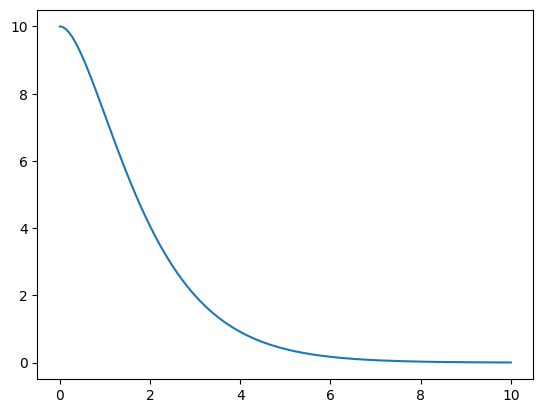

In [22]:
plt.plot(t_range, x1_func(t_range, 1,10))
plt.show()

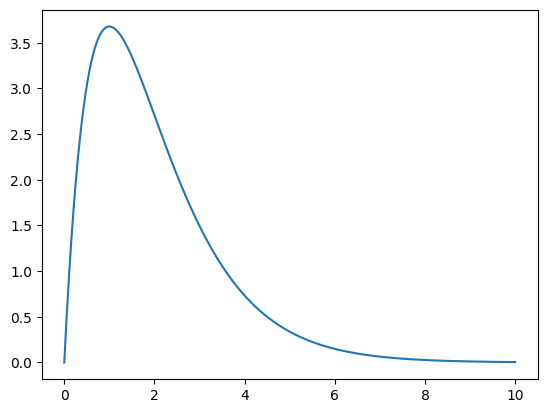

In [23]:
plt.plot(t_range, x2_func(t_range, 1,10))
plt.show()

## **Nadkritický útlum graf:**

In [32]:
x3 = x0*smp.exp(-delta*t)*(smp.cosh(d*t)+delta/d*smp.sinh(d*t))
x3

x_0*(\delta*sinh(t*sqrt(\delta**2 - \omega**2))/sqrt(\delta**2 - \omega**2) + cosh(t*sqrt(\delta**2 - \omega**2)))*exp(-\delta*t)

In [45]:
x3_func = smp.lambdify([t,w,x0,delta], x3)
x3_func(5,1,10,4)

5.38580404702235

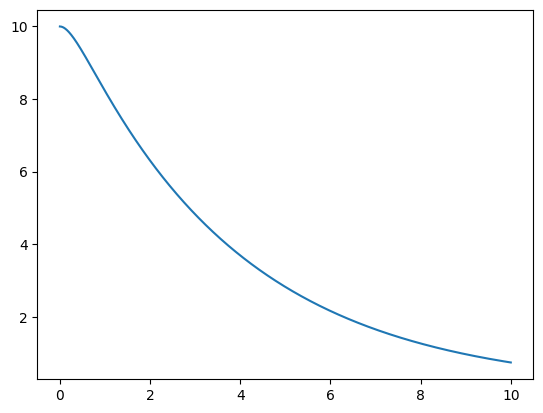

In [49]:
plt.plot(t_range, x3_func(t_range, 1,10,2))
plt.show()

In [51]:
x4 = o0/d*smp.exp(-delta*t)*smp.sinh(d*t)
x4

\Omega_0*exp(-\delta*t)*sinh(t*sqrt(\delta**2 - \omega**2))/sqrt(\delta**2 - \omega**2)

In [58]:
x4_func = smp.lambdify([t,w,o0,delta], x4)
x4_func(1,1,10,2)

2.1390913026027936

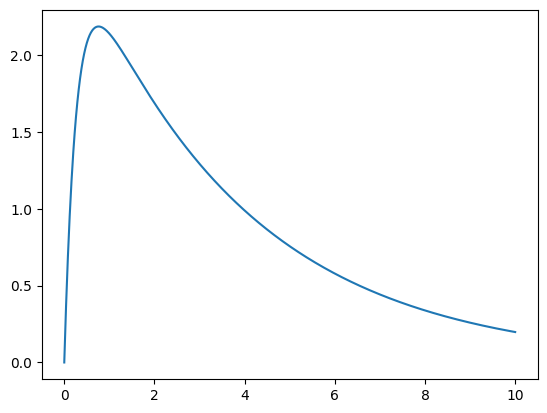

In [60]:
plt.plot(t_range, x4_func(t_range, 1,10,2))
plt.show()

## **Graf - všechny:**

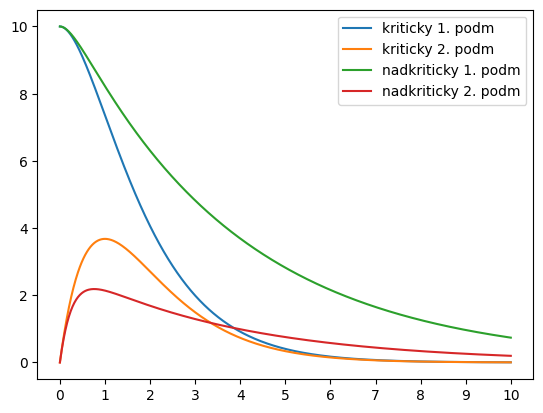

In [65]:
plt.plot(t_range, x1_func(t_range, 1,10), label = "kriticky 1. podm")
plt.plot(t_range, x2_func(t_range, 1,10), label = "kriticky 2. podm")
plt.plot(t_range, x3_func(t_range, 1,10,2), label = "nadkriticky 1. podm")
plt.plot(t_range, x4_func(t_range, 1,10,2), label = "nadkriticky 2. podm")
plt.legend()
plt.xticks(np.arange(11))
plt.show()